<h2><span style="color:red"> Name: Sanjana Bafana<br><br>
Task: Stock Market Prediction using Numerical and Textual Analysis<br><br>
    GRIP - The Sparks Foundation </span></h2>

In [1]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn import metrics 
from keras.models import Sequential
from keras.layers import Dense, LSTM
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math
import re
import nltk
import re
from nltk.corpus import stopwords
from textblob import TextBlob
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
import xgboost 

# Data 

In [2]:
# Dataframe for EDA
df = pd.read_csv('BESCN.csv')
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-12-17,41052.359375,41401.648438,41005.179688,41352.171875,41352.171875,19000.0
1,2019-12-18,41442.750000,41614.769531,41358.468750,41558.570313,41558.570313,24300.0
2,2019-12-19,41571.820313,41719.289063,41456.398438,41673.921875,41673.921875,33300.0
3,2019-12-20,41746.199219,41809.960938,41636.109375,41681.539063,41681.539063,33600.0
4,2019-12-23,41548.261719,41701.621094,41474.609375,41642.660156,41642.660156,6200.0
...,...,...,...,...,...,...,...
247,2020-12-11,46060.320313,46309.628906,45706.218750,46099.011719,46099.011719,26300.0
248,2020-12-14,46284.699219,46373.339844,45951.531250,46253.460938,46253.460938,18400.0
249,2020-12-15,46287.390625,46350.300781,45841.671875,46263.171875,46263.171875,16400.0
250,2020-12-16,46573.308594,46704.968750,46402.199219,46666.460938,46666.460938,13100.0


### Checking for null values

In [3]:
# Total null values in columns
df.isnull().sum()

Date         0
Open         2
High         2
Low          2
Close        2
Adj Close    2
Volume       2
dtype: int64

### Convert Date to datetime formate and use as dataframe index

In [4]:
df['Date'] = pd.to_datetime(df.Date,format='%Y-%m-%d')
df.index = df['Date']
df.dropna(inplace = True)

## Plotting closing price w.r.t to date

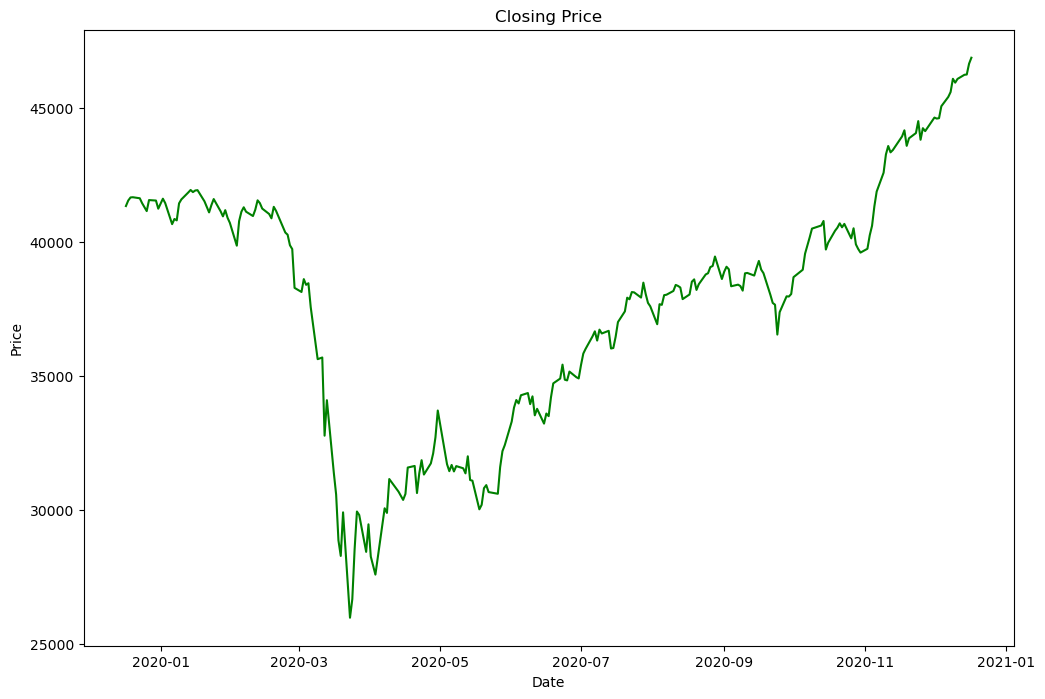

In [5]:
plt.figure(figsize=(12,8))
plt.title('Closing Price')
plt.plot(df['Close'],color = 'green')
plt.ylabel('Price')
plt.xlabel('Date')
plt.show()

In [6]:
# storing seed 
np.random.seed(7)

In [7]:
df2 = pd.read_csv('BESCN.csv', usecols=[5], engine='python')
df2.dropna(inplace=True)
df2 = df2.values
df2 = df2.astype('float32')

## Preparing Dataframe for X and Y

In [8]:
def create_dataset(df2, look_back=1):
    dataX, dataY = [], []
    for i in range(len(df2)-look_back-1):
        a = df2[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(df2[i + look_back, 0])
    return np.array(dataX), np.array(dataY)


## Data Normalization and Spliting`

In [9]:

# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
df2 = scaler.fit_transform(df2)

# split into train and test sets
train_size = int(len(df2) * 0.67)
test_size = len(df2) - train_size
train, test = df2[0:train_size,:], df2[train_size:len(df2),:]


In [10]:
look_back = 3
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)


In [11]:
#reshape input to be [past, present, future]
trainX = np.reshape(trainX, (trainX.shape[0], trainX.shape[1], 1))
testX = np.reshape(testX, (testX.shape[0], testX.shape[1], 1))


## Neural Network 

In [12]:
model = Sequential()
model.add(LSTM(9, input_shape=(look_back, 1)))
model.add(Dense(1))
model.compile(loss='mae', optimizer='adam')
model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)



Epoch 1/100

163/163 - 4s - loss: 0.2237 - 4s/epoch - 27ms/step
Epoch 2/100
163/163 - 1s - loss: 0.0725 - 715ms/epoch - 4ms/step
Epoch 3/100
163/163 - 1s - loss: 0.0383 - 723ms/epoch - 4ms/step
Epoch 4/100
163/163 - 1s - loss: 0.0310 - 749ms/epoch - 5ms/step
Epoch 5/100
163/163 - 1s - loss: 0.0315 - 752ms/epoch - 5ms/step
Epoch 6/100
163/163 - 1s - loss: 0.0295 - 782ms/epoch - 5ms/step
Epoch 7/100
163/163 - 1s - loss: 0.0328 - 695ms/epoch - 4ms/step
Epoch 8/100
163/163 - 1s - loss: 0.0301 - 669ms/epoch - 4ms/step
Epoch 9/100
163/163 - 1s - loss: 0.0315 - 670ms/epoch - 4ms/step
Epoch 10/100
163/163 - 1s - loss: 0.0312 - 689ms/epoch - 4ms/step
Epoch 11/100
163/163 - 1s - loss: 0.0305 - 716ms/epoch - 4ms/step
Epoch 12/100
163/163 - 1s - loss: 0.0300 - 740ms/epoch - 5ms/step
Epoch 13/100
163/163 - 1s - loss: 0.0307 - 710ms/epoch - 4ms/step
Epoch 14/100
163/163 - 1s - loss: 0.0306 - 739ms/epoch - 5ms/step
Epoch 15/100
163/163 - 1s - loss: 0.0304 - 701ms/epoch - 4ms/step
Epoch 16/100
163/1

## Make predictions for Train and Test

In [13]:
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)


3/3 [==============================] - 0s 7ms/step


### Invert predictions for original values

In [14]:
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])


## Plot Prediction

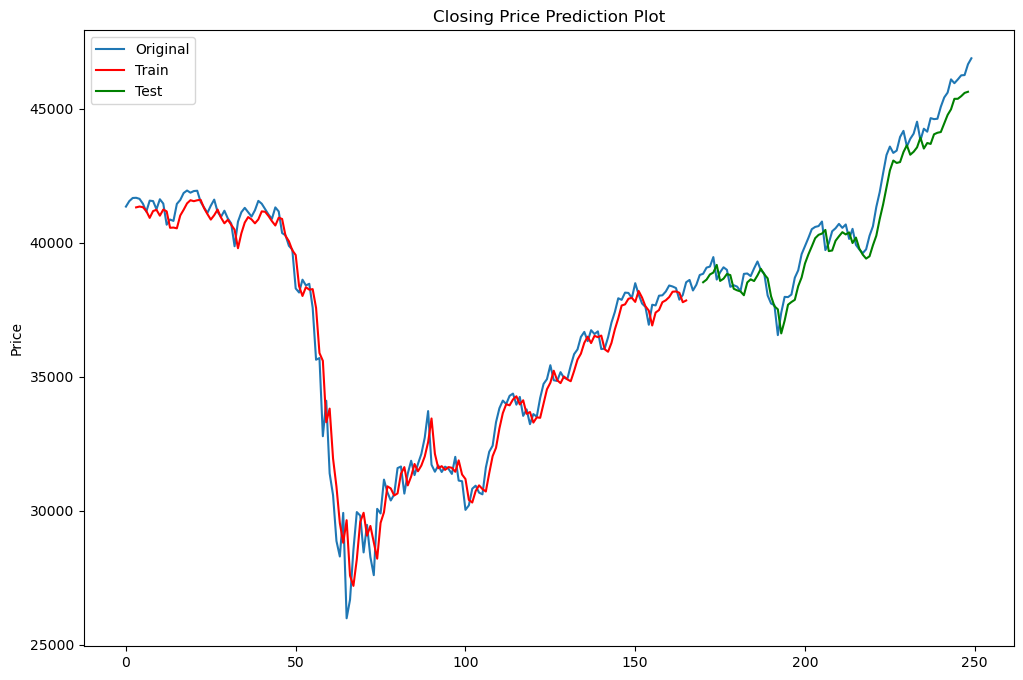

In [15]:
# shift train predictions for plotting
trainPredictPlot = np.empty_like(df2)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict

# shift test predictions for plotting
testPredictPlot = np.empty_like(df2)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(df2)-1, :] = testPredict

# plot baseline and predictions
plt.figure(figsize=(12,8))
plt.plot(scaler.inverse_transform(df2))
plt.plot(trainPredictPlot,color='red')
plt.plot(testPredictPlot,color='green',)
plt.legend(["Original", "Train",'Test'])
plt.ylabel('Price')
plt.title('Closing Price Prediction Plot')
plt.show()

# Calculating  mean absolute error

In [16]:
# calculate root mean absolute error
trainScore = mean_absolute_error(trainY[0], trainPredict[:,0])
print("Train mean absolute error = ",trainScore," MAE")
testScore = mean_absolute_error(testY[0], testPredict[:,0])
print("Test mean absolute error = ",testScore," MAE")


Train mean absolute error =  529.8341667148653  MAE
Test mean absolute error =  542.8171061867049  MAE


# Hybrid model for Numerical and textual Analysis

In [17]:
news = pd.read_csv('india-news-headlines.csv',index_col = False)
news.head()

,publish_date,headline_category,headline_text
0,20010102,unknown,Status quo will not be disturbed at Ayodhya; s...
1,20010102,unknown,Fissures in Hurriyat over Pak visit
2,20010102,unknown,America's unwanted heading for India?
3,20010102,unknown,For bigwigs; it is destination Goa
4,20010102,unknown,Extra buses to clear tourist traffic


# Text Preprocessing 

In [18]:
columns = ['Date','Category','News']
news.columns = columns
news.drop('Category',axis = 1,inplace = True)
news.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3650970 entries, 0 to 3650969
Data columns (total 2 columns):
 #   Column  Dtype 
---  ------  ----- 
 0   Date    int64 
 1   News    object
dtypes: int64(1), object(1)
memory usage: 55.7+ MB


In [19]:
 # Restructuring the date format
news['Date'] = news['Date'].astype('object')
news['Date'] = pd.to_datetime(news['Date'], format='%Y%m%d')

### Grouping the headlines for each day

In [20]:

news['News'] = news.groupby(['Date']).transform(lambda x : ' '.join(x)) 
news = news.drop_duplicates() 
news.reset_index(inplace = True, drop = True)

In [21]:
news = news[:256]
news

,Date,News
0,2001-01-02,Status quo will not be disturbed at Ayodhya; s...
1,2001-01-03,Powerless north India gropes in the dark Think...
2,2001-01-04,The string that pulled Stephen Hawking to Indi...
3,2001-01-05,Light combat craft takes India into club class...
4,2001-01-06,Light combat craft takes India into club class...
...,...,...
251,2001-10-22,State govt. defends move on Ghai's film instit...
252,2001-10-23,'Safe passage' hits patch; Zoo animals breathe...
253,2001-10-24,Wholesalers sell medicines directly to many cu...
254,2001-10-25,Heroin seized; two detained Security around RJ...


## Adding Subjectivit and plority score

In [22]:
#Functions to get the subjectivity and polarity
def getSubjectivity(text):
  return TextBlob(text).sentiment.subjectivity

def getPolarity(text):
  return  TextBlob(text).sentiment.polarity

In [23]:
#Adding subjectivity and polarity columns
news['Subjectivity'] = news['News'].apply(getSubjectivity)
news['Polarity'] = news['News'].apply(getPolarity)
news

,Date,News,Subjectivity,Polarity
0,2001-01-02,Status quo will not be disturbed at Ayodhya; s...,0.282333,0.151333
1,2001-01-03,Powerless north India gropes in the dark Think...,0.407692,0.088462
2,2001-01-04,The string that pulled Stephen Hawking to Indi...,0.446847,0.087961
3,2001-01-05,Light combat craft takes India into club class...,0.476612,0.262024
4,2001-01-06,Light combat craft takes India into club class...,0.439394,0.248485
...,...,...,...,...
251,2001-10-22,State govt. defends move on Ghai's film instit...,0.458529,0.007650
252,2001-10-23,'Safe passage' hits patch; Zoo animals breathe...,0.456753,0.024063
253,2001-10-24,Wholesalers sell medicines directly to many cu...,0.430705,0.098858
254,2001-10-25,Heroin seized; two detained Security around RJ...,0.351563,-0.040932


## Performing Sentiment Analysis over the news Headlines

In [26]:
#Adding sentiment score to news
sia = SentimentIntensityAnalyzer()
news['Compound'] = [sia.polarity_scores(v)['compound'] for v in news['News']]


In [27]:
news['Negative'] = [sia.polarity_scores(v)['neg'] for v in news['News']]

In [28]:
news['Neutral'] = [sia.polarity_scores(v)['neu'] for v in news['News']]


In [29]:
news['Positive'] = [sia.polarity_scores(v)['pos'] for v in news['News']]

In [30]:
d1 = news[['Subjectivity', 'Polarity', 'Compound', 'Negative', 'Neutral' ,'Positive']]
d1

,Subjectivity,Polarity,Compound,Negative,Neutral,Positive
0,0.282333,0.151333,-0.9811,0.122,0.807,0.071
1,0.407692,0.088462,-0.2640,0.122,0.766,0.111
2,0.446847,0.087961,0.8738,0.100,0.797,0.103
3,0.476612,0.262024,0.9769,0.124,0.719,0.157
4,0.439394,0.248485,-0.4215,0.152,0.704,0.143
...,...,...,...,...,...,...
251,0.458529,0.007650,-0.9986,0.173,0.722,0.105
252,0.456753,0.024063,-0.9998,0.213,0.697,0.090
253,0.430705,0.098858,-0.9984,0.176,0.726,0.098
254,0.351563,-0.040932,-0.9984,0.178,0.711,0.111


## Data Normalization

In [31]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
new_df = pd.DataFrame(sc.fit_transform(d1))
new_df.columns = d1.columns
new_df.index = d1.index
new_df.head()

,Subjectivity,Polarity,Compound,Negative,Neutral,Positive
0,0.282333,0.427407,0.009455,0.274775,0.807,0.116776
1,0.407692,0.357550,0.370097,0.274775,0.766,0.182566
2,0.446847,0.356994,0.942315,0.225225,0.797,0.169408
3,0.476612,0.550397,0.994166,0.279279,0.719,0.258224
4,0.439394,0.535354,0.290887,0.342342,0.704,0.235197


## Spliting Dataset between Train and Test

In [32]:

from sklearn.model_selection import train_test_split
X = new_df[0:250]
y =df['Close']


x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 0)
x_train.shape


(200, 6)

### Creating Model

In [33]:
Rf = RandomForestRegressor()
Rf.fit(x_train, y_train)
prediction=Rf.predict(x_test)

In [34]:
adb = AdaBoostRegressor()
adb.fit(x_train, y_train)
predict = adb.predict(x_test)

### Model Accuracy 

In [35]:

print("Root mean square error of RF model= ",math.sqrt(mean_squared_error(prediction,y_test))," RMSE") 
print("Root mean square error of Adb model = ",math.sqrt(mean_squared_error(predict,y_test))," RMSE") 

Root mean square error of RF model=  4208.417770171128  RMSE
Root mean square error of Adb model =  3793.7549109129345  RMSE


**I have used two models, i.e., Random Forest Regressor and Adaboost Regressor to carry out hybrid analysis. From the RMSE values we see that Random Forest Regressor gives a mode accurate output (3960 RMSE). However, both the models have very high RMSE values. The reason for high values is the unpredictible nature of the stock prices.**
